# Initial data exploration and base preprocessing data

## Data description

The dataset [goodbooks-10k](https://github.com/zygmuntz/goodbooks-10k/tree/master) contains six million ratings for ten thousand most popular (with most ratings) books. 

#### Contents: 

* **ratings.csv** contains ratings go from one to five. Both book IDs and user IDs are contiguous. For books, they are 1-10000, for users, 1-53424
    
* **books.csv** has metadata for each book (goodreads IDs, authors, title, average rating, etc.).


## Dataset Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv')
books = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')

In [3]:
to_read = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/to_read.csv')

## Initial data exploration 

### Get information about the dataset ratings.csv

In [4]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


In [6]:
ratings.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [7]:
# How much ratings the users have

ratings['user_id'].value_counts()

12874    200
30944    200
52036    199
12381    199
28158    199
        ... 
32128     21
40753     21
51725     21
43675     20
34590     19
Name: user_id, Length: 53424, dtype: int64

In [8]:
# Average number of ratings per user

sum(ratings['user_id'].value_counts()) / len(ratings['user_id'].unique())

111.86880428271938

In [9]:
# How much ratings the books have

ratings['book_id'].value_counts()

1       22806
2       21850
4       19088
3       16931
5       16604
        ...  
9315       36
1935       33
9486       24
9345       11
7803        8
Name: book_id, Length: 10000, dtype: int64

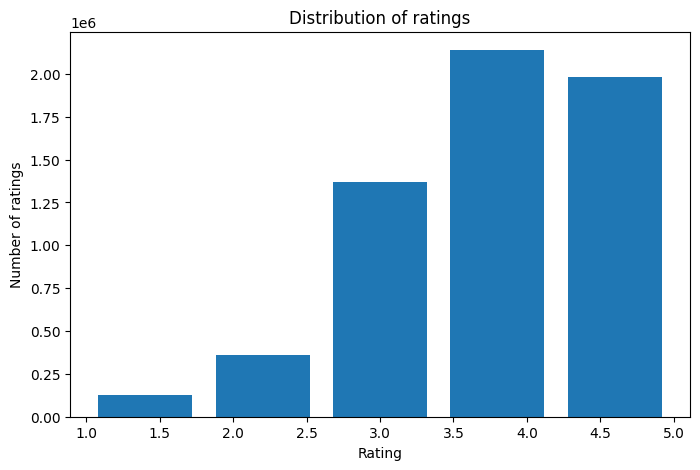

In [10]:
# Distribution of ratings

plt.figure(figsize=(8,5))
plt.hist(x=ratings['rating'], bins=5, rwidth=0.8)
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.title('Distribution of ratings')
plt.show()

**Insights from the data:**
1. Data is cleaned
2. Each user has rated from 8 to 200 books
3. In average, each user rated 112 books (good amount)
4. Books have different number of ratings (from 8 to 22806)
5. Most of the ratings are high-valued (4 or 5 grade)

### Get information about the books.csv

In [11]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [13]:
books.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [43]:
# The number of books of each author

books['authors'].value_counts().head(10)

Stephen King       60
Nora Roberts       59
Dean Koontz        47
Terry Pratchett    42
Agatha Christie    39
Meg Cabot          37
James Patterson    36
David Baldacci     34
J.D. Robb          33
John Grisham       33
Name: authors, dtype: int64

In [19]:
books['authors'].value_counts().tail(5)

Ildefonso Falcones                                                                                                                                                                                                                        1
Jon Stewart, Rory Albanese, Kevin Bleyer, Rich Bloomquist, Steve Bodow, Tim Carvell, Wyatt Cenac, Hallie Haglund, J.R. Havlan, David Javerbaum, Elliott Kalan, Josh Lieb, Sam Means, Jo Miller, John Oliver, Daniel Radosh, Jason Ross    1
G. Norman Lippert                                                                                                                                                                                                                         1
Brother Andrew, Elizabeth Sherrill, John Sherrill                                                                                                                                                                                         1
John Keegan                                             

In [44]:
# How many times we can meet the same book in the data

books[books['title'].str.contains('Green Mile')]['title']

487                                        The Green Mile
5948           The Green Mile, Part 1: The Two Dead Girls
8370    The Green Mile, Part 4: The Bad Death of Eduar...
8828        The Green Mile, Part 2: The Mouse on the Mile
9146               The Green Mile, Part 3: Coffey's Hands
9359           The Green Mile, Part 6: Coffey on the Mile
9922                The Green Mile, Part 5: Night Journey
Name: title, dtype: object

In [35]:
books[books['title'].str.contains('Hunger Games')]['title']

0                 The Hunger Games (The Hunger Games, #1)
16                   Catching Fire (The Hunger Games, #2)
19                      Mockingjay (The Hunger Games, #3)
506     The Hunger Games Trilogy Boxset (The Hunger Ga...
716     The Hunger Games: Official Illustrated Movie C...
1354                       The Hunger Games Tribute Guide
6223    The World of the Hunger Games (Hunger Games Tr...
8576    The Girl Who Was on Fire: Your Favorite Author...
Name: title, dtype: object

**Insights from the books.csv:**
1. The data is mainly cleaned. Some books do not have original publication year.
2. There are authors with a large number of books in the dataset (max is 60 by Stephen King). 
3. There can be multiple entries of some books. For example, the green mile has 7 entries: the full books and 6 books representing each part of the books. Some book series as Harry Potter or the Hunger games have "boxset" entry with all books parts.

The point 2 and 3 can affect the work of the content-based model because the model will recommend the most similar books and may produce recommendations with only one author or already read books in other samples (as with green mile).

Further we will work with book_id, author', original_publication_year, title, average_rating, and image_url columns.

### Get information about to_read.csv

In [36]:
to_read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [42]:
# Number of books marked by users

to_read['user_id'].value_counts()

38457    117
28259    114
38076    110
44530    108
46555    107
        ... 
49559      1
49768      1
3645       1
41692      1
21682      1
Name: user_id, Length: 48871, dtype: int64

In [40]:
# Number of users in the data

len(to_read['user_id'].unique())

48871

In [41]:
# Average number of marked books per user

sum(to_read['user_id'].value_counts()) / len(to_read['user_id'].unique())

18.675799553927686

**Insights from the to_read.csv:**

The data from to_read.csv can be used to evaluate the precision@k and recall@k metrics. However,

1. Each user has different number of books marked with "to read". The average amount of such books is 19.
2. More than 5000 users have not marked any book.
3. The range of estimates is quite large (from 1 to 117). This means that for people with a large number of marked books, it will be difficult to evaluate a good recall, and for people with a small number of marked books, the recall will vary greatly in value.

It was decided not to use this data to evaluate the models.

## Preprocessing data

In [45]:
# Select the necessary columns
books_information = books[['book_id', 'authors', 'original_publication_year', 'title', 'average_rating', 'image_url']]

books_information.head()

,book_id,authors,original_publication_year,title,average_rating,image_url
0,1,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34,https://images.gr-assets.com/books/1447303603m...
1,2,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,https://images.gr-assets.com/books/1474154022m...
2,3,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",3.57,https://images.gr-assets.com/books/1361039443m...
3,4,Harper Lee,1960.0,To Kill a Mockingbird,4.25,https://images.gr-assets.com/books/1361975680m...
4,5,F. Scott Fitzgerald,1925.0,The Great Gatsby,3.89,https://images.gr-assets.com/books/1490528560m...


In [46]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train, test = train_test_split(ratings, test_size=0.2, random_state=42)

## Save datasets

In [50]:
train.to_csv('../data/interim/train.csv', index=False)
test.to_csv('../data/interim/test.csv', index=False)

In [51]:
books_information.to_csv('../data/interim/books_information.csv', index=False)